# Lab 04 - Exploratory Data Analysis

The data that will be used for this EDA activity is the same as the one used during the lectures. Data about earthquakes.
The data is in the folder ‘data’ and is distributed on 3 csv files:
- From1900_1949_Mag5.5+.csv
- From1950_1999_Mag5.5+.csv
- From2000_Mag5.5+.csv

## Exercise 01 - Reading the data

Start by reading each of the data files to a dataframe, verify that the data has been well loaded showing the information of each of the dataframes. Make the index the `time` column.

In [ ]:
# The time column is the first one
import pandas as pd

# read each file for a different dataframe, df1, df2, df3

# print the info about each one


Concatenate everything in a dataframe with a `df` name. Verify that all lines are in the created data frame. Take a look of the first 10 records.

**Hint:**: Search for the function [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

## Exercise 02 - Sort the dataframe by date (index)

The dataframe records are not ordered chronologically in ascending order. Check the firts 10 and the last 10. Sort them and do not forget that the ordering must be done by the index.

Do the sort in such a way that the DataFrame df becomes sorted.

**Hint:** check the method [´sort_index´](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html)Sort the dataframe by date

## Exercise 03 - Check for the absence of duplicate records

Each record corresponds to a seismic event and each one as identification in the column `id`.

Verify that there is no repeated records. Then show the first 10 values of the `id` column (use the alphabetical order and not that of the index).

**Hint:** use the method `describe` 

In [ ]:
# show the first 10 values of the `id` column


## Exercise 04 - Show the absolute frequency of the variable `type`

The `describe()` function provides some information about a series. Try it.

But it doesn't show the absolute frequency. Show a table with the absolute frequency of the `type` variable. 

**Tip:** check the method [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

Check the type of the returned table. `type(...)`.

Show the table in the form of a bar graph (horizontal), in descending order of frequencies. Add a title.

Check the documentation of [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method of pandas. Check also the [`invert_yaxis()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.invert_yaxis.html) from matplotlib. 

Since the number of earthquake is much bigger than the others, try to use a logscale.

## Exercise 05 - Show the relative frequency of the variable `type`

First in table format:

In [16]:
# the natural solution. We need to devide by the total count


In [17]:
# the easy solution. Check the arguments of 'value_counts'


And also in the form of a bar graph (vertical, in ascending order):

## Exercise 06 - Repeat the previous exercise, but for the variable `net`

Table with the relative frequency:

Bar chart with relative frequencies:

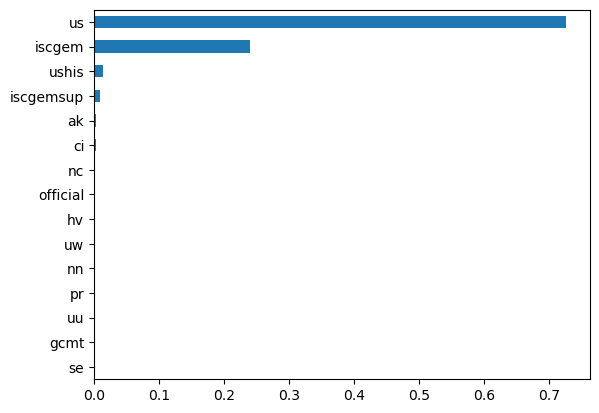

##  Exercise 07 - Reduce the cardinality of variables

As can be seen by the relative frequency distribution of the locationSource variable, it has a very large cardinality, and only 3 of the values weigh more than 1%

In [ ]:
# df['locationSource'].value_counts(normalize=True)

In addition, the rest have a very low total weight (< 2%). 

Read the following article [4 “Effective Methods” To Filter Pandas Dataframe](https://blog.jovian.ai/4-effective-methods-to-filter-pandas-dataframe-1243926d3d03) and in particular the section “Method 1: Boolean Mask”.

Uncomment the two lines of code bellow:

In [4]:
# locSourceFreq = df['locationSource'].value_counts(normalize=True)
# locSourceFreq[locSourceFreq < 0.01].sum()

0.01885300351121374

This is a situation where it is common to use a cardinality reduction technique, grouping several values into a single, new one. In this case, we intend to stay with only 4 values:
- Us
- iscgem
- ushis
- other

Being the last representative value of all other values grouped.

### Approach 1

Let's start by getting all the values of `locationSource` with a relative frequency of less than 1%, in a list:

In [19]:
# uncomment the two lines below 
# toreplace = locSourceFreq[locSourceFreq < 0.01].index.values.tolist()
# toreplace

We can now define a function that, given a value and a list, returns `other` if the value belongs to the list and the value itself otherwise. Here is the function and some simple tests:

In [6]:
# function that return 'other' if the value belongs to the list 'others'
def trf(v, others):
    if v  in others:
        return 'other'
    else:
        return v
    
print(trf('a', ['a', 'b', 'c']))
print(trf('b', ['a', 'b', 'c']))

print(trf('d', ['a', 'b', 'c']))
print(trf('e', ['a', 'b', 'c']))

other
other
d
e


What we would like was to apply this function to the values of the `locationSource` column of the data frame, using as a second argument the list of values that should be replaced by 'other'. 

Fortunately, pandas allows you to apply a function to the values of a series, but the function to be applied should have only one argument. Let's start by defining the function (of a single argument) that we want to apply:

In [7]:
# we will use the variable 'toreplace' computed before

def trf2(v):
    return trf(v, toreplace)

print(trf2('us'))
print(trf2('rspr'))

us
other


Note that this function (`trf2`) uses the previously defined function (`trf`), but fixes the second argument of the call (with the global variable computed before `toreaplace`). 

Let's see the result of applying this function to the column `locationSource`, using the [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) method of the Series class:

In [8]:
df['locationSource'].apply(trf2)

time
1949-12-29 03:03:56+00:00           iscgem
1949-12-27 23:57:15+00:00           iscgem
1949-12-26 06:23:58+00:00           iscgem
1949-12-25 23:24:54+00:00           iscgem
1949-12-25 23:17:33+00:00           iscgem
                                     ...  
2000-01-05 07:32:19.180000+00:00        us
2000-01-02 15:16:32.280000+00:00        us
2000-01-02 12:58:42.300000+00:00        us
2000-01-02 12:14:39.090000+00:00        us
2000-01-01 05:58:19.780000+00:00        us
Name: locationSource, Length: 31613, dtype: object

The result is a series that could replace the original column of our data frame. 

Before something gets spoiled, and why are we going to repeat the exercise using another approach lets copy the result to a new dataframe `df_aux`.

Check the documentation of [`copy`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html).

In [12]:
# uncomment the line below:
# df_aux = df.copy()

To replace the original dataframe column just make the affectation. In the end, show that it worked.

Check that the dataframe `df_aux` remains unchanged:

### Approach 2

Do you remember what was explained in this article?
Remember that the list with the values of the `locationSource` variable to be replaced is in the `toreplace` variable:

In [20]:
# uncomment the line below:
# toreplace

The expression below returns a dataframe containing only the rows where the `locationSource` column has the value 'ak':

In [21]:
# uncomment the line below:
# df_aux[df_aux['locationSource'] == 'ak']

Do you remember what was explained in this article [4 “Effective Methods” To Filter Pandas Dataframe](https://blog.jovian.ai/4-effective-methods-to-filter-pandas-dataframe-1243926d3d03) and in particular the section “Method 1: Boolean Mask”? 

The expression used to index the data frame is, in fact, a series of booleans, with the `True` value for the dataframe indexes that contain the value 'ak' in the column `locationSource`.

In [22]:
# uncomment the line below:
# df_aux['locationSource'] == 'ak'

We can use the  [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) property to access a group of rows and columns in the data frame. 

In this case the rows are the ones already mentioned, and only the `locationSource` column interests us. The line below makes this access to affect the column `locationSource` of these lines with the value 'other':

In [23]:
# uncomment the lines below:

# df_aux.loc[df_aux.locationSource == 'ak','locationSource'] = 'other'
#
# print('ak' in df_aux['locationSource'].value_counts().index)
# print('us' in df_aux['locationSource'].value_counts().index)

The above result shows that there are no longer occurrences of the 'ak' value in the `locationSource` column. We can now repeat the recipe for all other values to be replaced:

In [24]:
# uncomment the lines below:
# for x in toreplace:
#     df_aux.loc[df_aux['locationSource'] == x, 'locationSource'] = 'other'
#             
# df_aux['locationSource'].value_counts()

In fact, the piece of code above even tries to replace the 'ak' value again, although it no longer exists, but it doesn't hurt. The solution is correct and the previous replacement of the 'ak' value was only to show the mechanism used.

The data processing done for `locationSource` could be applied to the `magSource` variable.

## Excercise 08 - Compute new variables from `place`

The `place` column has too many distinct values:

In [26]:
# df['place'].describe()

Looking at its values, it is noticed that, in reality, the column seems to be formed by more elementary variables (distance, location, region):

In [25]:
# inspect few values from 'place' column

# print(df['place'].head(10))
# print(df['place'].tail(10))

In [27]:
# Check if some of the places are null (12 rows have place with Null)
# Both isna() and isnull() functions are used to find the missing values in the pandas dataframe.
# isnull() and isna() literally does the same things.

### Excercise 08.1 - calculate the region

Define a function that, given a string with a value of `place`, returns the final part, corresponding to the region.

The region is the part of `place` from the last `,` up to the end.

Take a look at [`split`](https://www.w3schools.com/python/ref_string_split.asp) and all the strip mnethods [`strip`](https://www.geeksforgeeks.org/python-string-methods-set-3-strip-lstrip-rstrip-min-max-maketrans-translate-replace-expandtabs/) methods of strings. In general is advised to remove all invisible characters from the results strings.

In [28]:
def region(s):
    return s

print(region('118 km NW of Lata, Solomon Islands'))
print(region('Solomon Islands'))
print(region(''))

118 km NW of Lata, Solomon Islands
Solomon Islands



The null values are represented in python by the keyword `None`. Check this article [Null in Python: Understanding Python's NoneType Object](https://realpython.com/null-in-python/) and [Pandas Isna Vs Isnull – Differences Explained](https://www.stackvidhya.com/pandas-isna-vs-isnull/).

What is the result of calling region with a Null value?

In [29]:
# Try to apply the function to a value 'None'

print(region(None))

None


Modify the `region` function to return `None` if `None` is the argument

**Hint:** use `try` and `except`

In [30]:
def region(s):
    return s

print(region('118 km NW of Lata, Solomon Islands'))
print(region('Solomon Islands'))
print(region(''))
print(None)

118 km NW of Lata, Solomon Islands
Solomon Islands

None


### Excercise 08.2 - add a new column with the region

Add to the dataframe a new `region` column obtained by applying the previous function to the values of the `place` column:

How many diferent regions?

Since they are so many lets take a look on the absoute frequency for those regions with more than 100 events in the dataset.

### Excercise 08.3

Show a table of absolute frequencies for the 20 regions with the highest number of events:

Show a table of relative frequencies for the 20 regions with the highest number of events:

Show a table of relative frequencies for the regions with more than 200 events:

Show a table of relative frequencies for the regions with more than 1% of the events in the dataset

Show a graph with the number of events in the regions with more than 1% of the events in the dataset:

### Excercise 08.4

When considering the Top N categories, to perceive the frequency distribution, the remaining categories are grouped into a new category called "others". In this case we intend to make a bar graph with the distribution of the top 15 regions and another region called "other regions".

In [ ]:
# set n for top n
top_n = 20 
# top n regions: from 0 to n-1
top_n_and_others = 
# sum of the other regions
sum_others = 
# add a new entry on the series object

# plot the chart


## Excercise 09 - Continuous numerical variable

Show the summary statistics of the `depth` variable:

Show a *boxplot* for the `depth` variable. Check the different ways of calling for a boxplot
[`DataFrame.boxplot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot), [`DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [32]:
# alternative 1


In [33]:
# alternative 2


Show a histogram of the `depth` variable, with 20 bins:

Show a histogram of the `depth` variable, with 60 bins:

Note that the appearance of the hsitogram is very sensitive to the bins used. Now show the two histograms side by side:

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

df.hist('depth', bins=20, ax=axes[0])
df.hist('depth', bins=60, ax=axes[1])

Show a [`KDE`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html) plot of the `depth` variable. Check what is [Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

Show a histogram for the variable `mag`, with 40 bins:

Show a KDE plot of the `mag` variable. 

## Excercise 10 - View on the Map

Let's see the last 5000 events on the map:

In [13]:
import folium

myMap = folium.Map(location = (20, 0), zoom_start=2)

# add marker one by one on the map

# Remover esta linha 
# df = pd.DataFrame()

for i in df.index[-5000:]:
    folium.Circle(
        location=[df.loc[i]['latitude'], df.loc[i]['longitude']],
        radius=20,
        popup=df.loc[i]['mag'],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(myMap)

# Show the map    
myMap

Bom trabalho!